In [43]:
# Goal: Investigate if we can make the Arnett model show the plateau at t0?
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from scipy.integrate import quad

In [54]:
# lets assume some WR star
r0 = 8*u.Rsun.to(u.cm)
# scale velocity
v_sc = 10912 * u.km.to(u.cm) # /s

# hydro timescale
t_hydro = r0/v_sc
print('T_hydro ~', t_hydro)

# ejecta mass guess
m_ej = 1*u.Msun.to(u.g)

# opacity guess
kappa = 0.05

beta = 13.8
t_0 = kappa*m_ej / beta/(const.c.cgs.value)/r0
print('T_0 ~', t_0)

w = np.sqrt(2*t_hydro/t_0)
w = 0.11
print('w ~', w)

t_m = np.sqrt(2*t_0*t_hydro)
print('T_m ~', t_m)

# plateau lum estimate
lum_plateau = 6.29e41

# nickel estimate from late-time
m_ni = 0.25 * u.Msun.to(u.g)

T_hydro ~ 510.04398826979474
T_0 ~ 431781603.68822944
w ~ 0.11
T_m ~ 663668.0061697603


In [55]:
t = np.linspace(0,30)*3600*24 # s
x = t/t_m

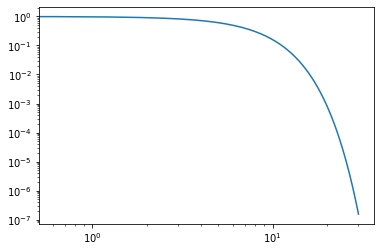

In [56]:
plt.loglog(t/24/3600, np.exp(-(w*x+x**2)))

In [57]:
# e_th(0) estimate
eth = t_0*lum_plateau#/1e10
print('E_th(0) estimate: %e' % eth)


# y-parameter from Arnett
t_ni = 7.6e5 # s
y = t_m/2/t_ni
print('y param: %e' % y)

E_th(0) estimate: 2.715906e+50
y param: 4.366237e-01


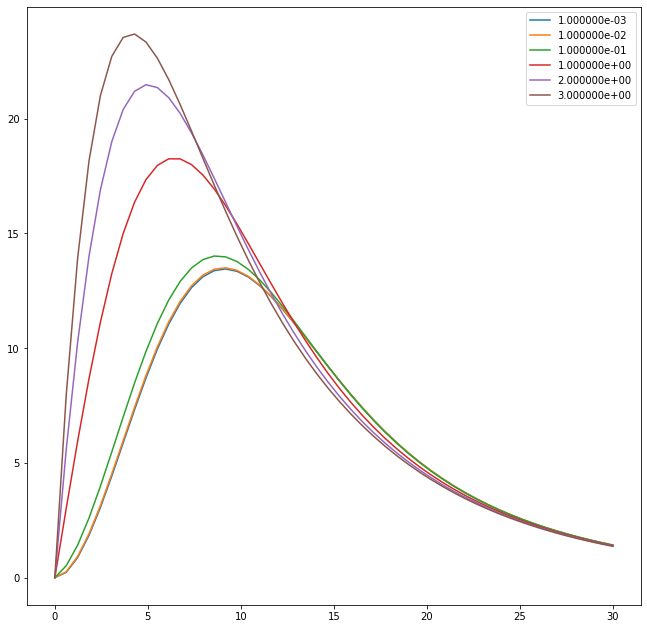

In [61]:
plt.figure(figsize=(11,11))
# diffusion stuff
def integrand(z):
    u1 = w*z + z**2
    return (w+2*z)*np.exp(-2*y*z+u1)

eps_ni = 4.8e10
def lumsfunc(xp, w):
    u1 = w*xp + xp**2
    return eps_ni*m_ni*t_0/eth * np.exp(-u1) * quad(integrand, 0, xp)[0]
lumsfuncV = np.vectorize(lumsfunc)
for w in [0.001, 0.01, 0.1, 1.0, 2.0, 3.0]:
    lums = lumsfuncV(x, w)
    plt.plot(t/24/3600, lums, label='%e' % w)
plt.legend()

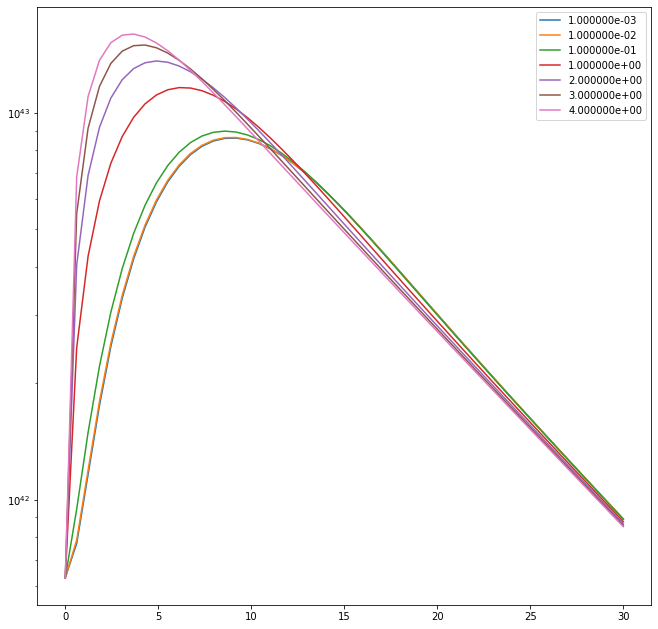

In [72]:
plt.figure(figsize=(11,11))
# diffusion stuff
def integrand(z, w):
    u = w*z + z**2
    return (w+2*z)*np.exp(-2*y*z+u)

eps_ni = 4.8e10
def lumsfunc(xp, w):
    u = w*xp + xp**2
    diff = eps_ni*m_ni*t_0/eth * np.exp(-u) * quad(integrand, 0, xp, args=(w,))[0]
    #diff = 0
    return (diff + np.exp(-u))*eth/t_0
lumsfuncV = np.vectorize(lumsfunc)
for w in [0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0]:
    lums = lumsfuncV(x, w)
    plt.plot(t/24/3600, lums, label='%e' % w)
plt.legend()
plt.semilogy();

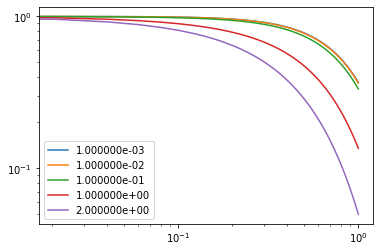

In [41]:
for w in [0.001, 0.01, 0.1, 1, 2]:
    x = np.linspace(0,1)
    u = w*x+x**2
    plt.loglog(x, np.exp(-u), label='%e' % w)
plt.legend()

In [ ]:
np.sqrt(2)